# Importing

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

In [5]:
data_train= pd.read_csv('train.csv')
data_test= pd.read_csv('test.csv')
data_test=data_test.drop(columns='id')

data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [6]:
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


# Exploratory Data Analysis

In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   int64  
 1   blue           1000 non-null   int64  
 2   clock_speed    1000 non-null   float64
 3   dual_sim       1000 non-null   int64  
 4   fc             1000 non-null   int64  
 5   four_g         1000 non-null   int64  
 6   int_memory     1000 non-null   int64  
 7   m_dep          1000 non-null   float64
 8   mobile_wt      1000 non-null   int64  
 9   n_cores        1000 non-null   int64  
 10  pc             1000 non-null   int64  
 11  px_height      1000 non-null   int64  
 12  px_width       1000 non-null   int64  
 13  ram            1000 non-null   int64  
 14  sc_h           1000 non-null   int64  
 15  sc_w           1000 non-null   int64  
 16  talk_time      1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [8]:
data_train.shape

(2000, 21)

In [9]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## plotting

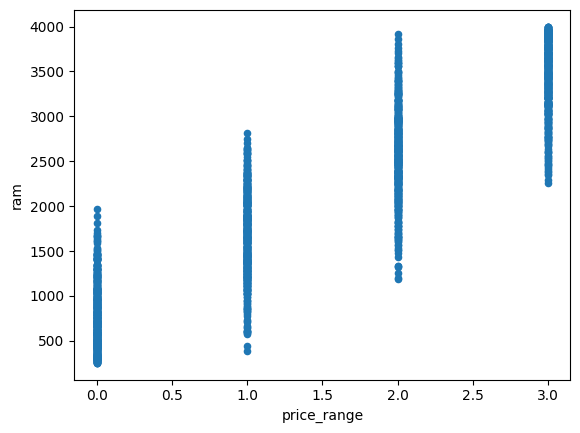

In [10]:
data_train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

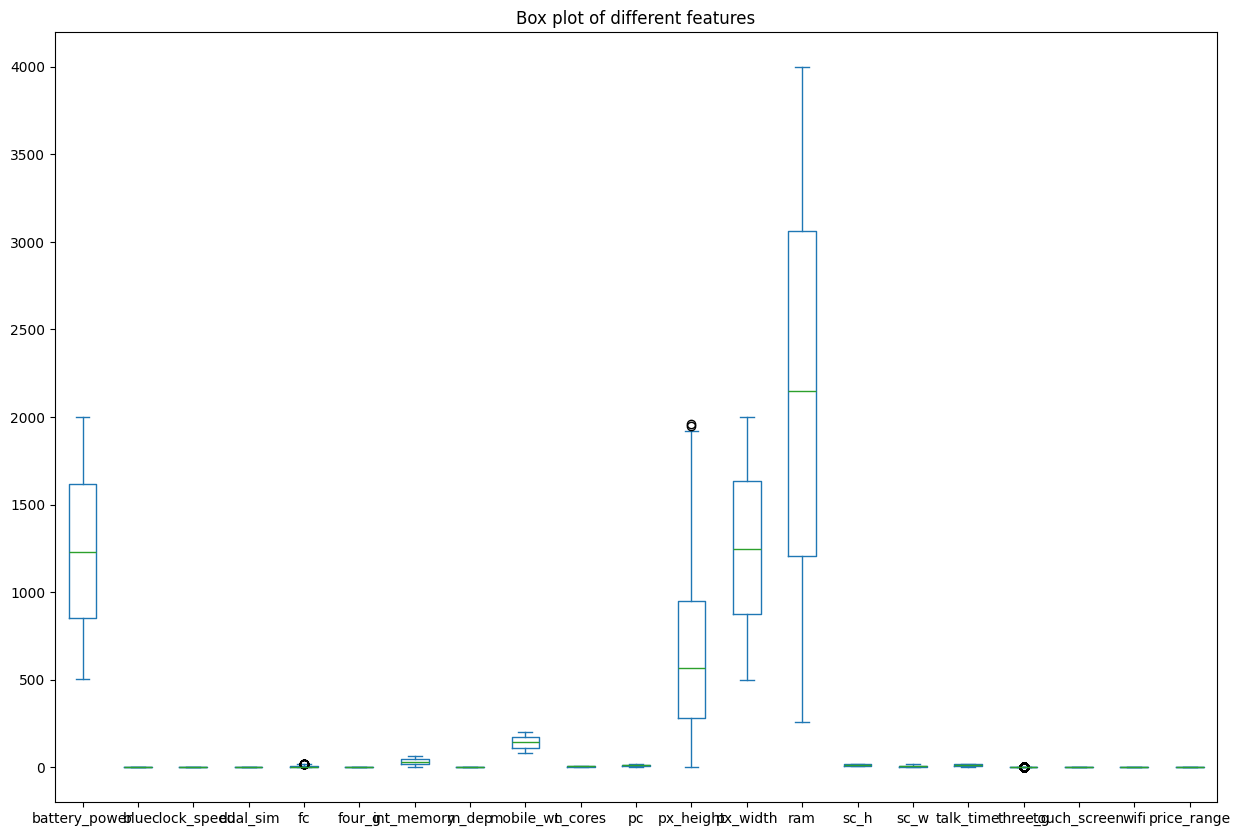

In [50]:
data_train.plot(kind='box',figsize=(15,10))
plt.title("Box plot of different features")
plt.show()

In [12]:
correlation=data_train.corr()
price_range_corr = correlation[['price_range']]
price_range_corr=price_range_corr.drop('price_range')

In [13]:
price_range_corr

,price_range
battery_power,0.200723
blue,0.020573
clock_speed,-0.006606
dual_sim,0.017444
fc,0.021998
four_g,0.014772
int_memory,0.044435
m_dep,0.000853
mobile_wt,-0.030302
n_cores,0.004399


In [14]:
price_range_corr.sort_values(by='price_range',ascending=False)

,price_range
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986
fc,0.021998


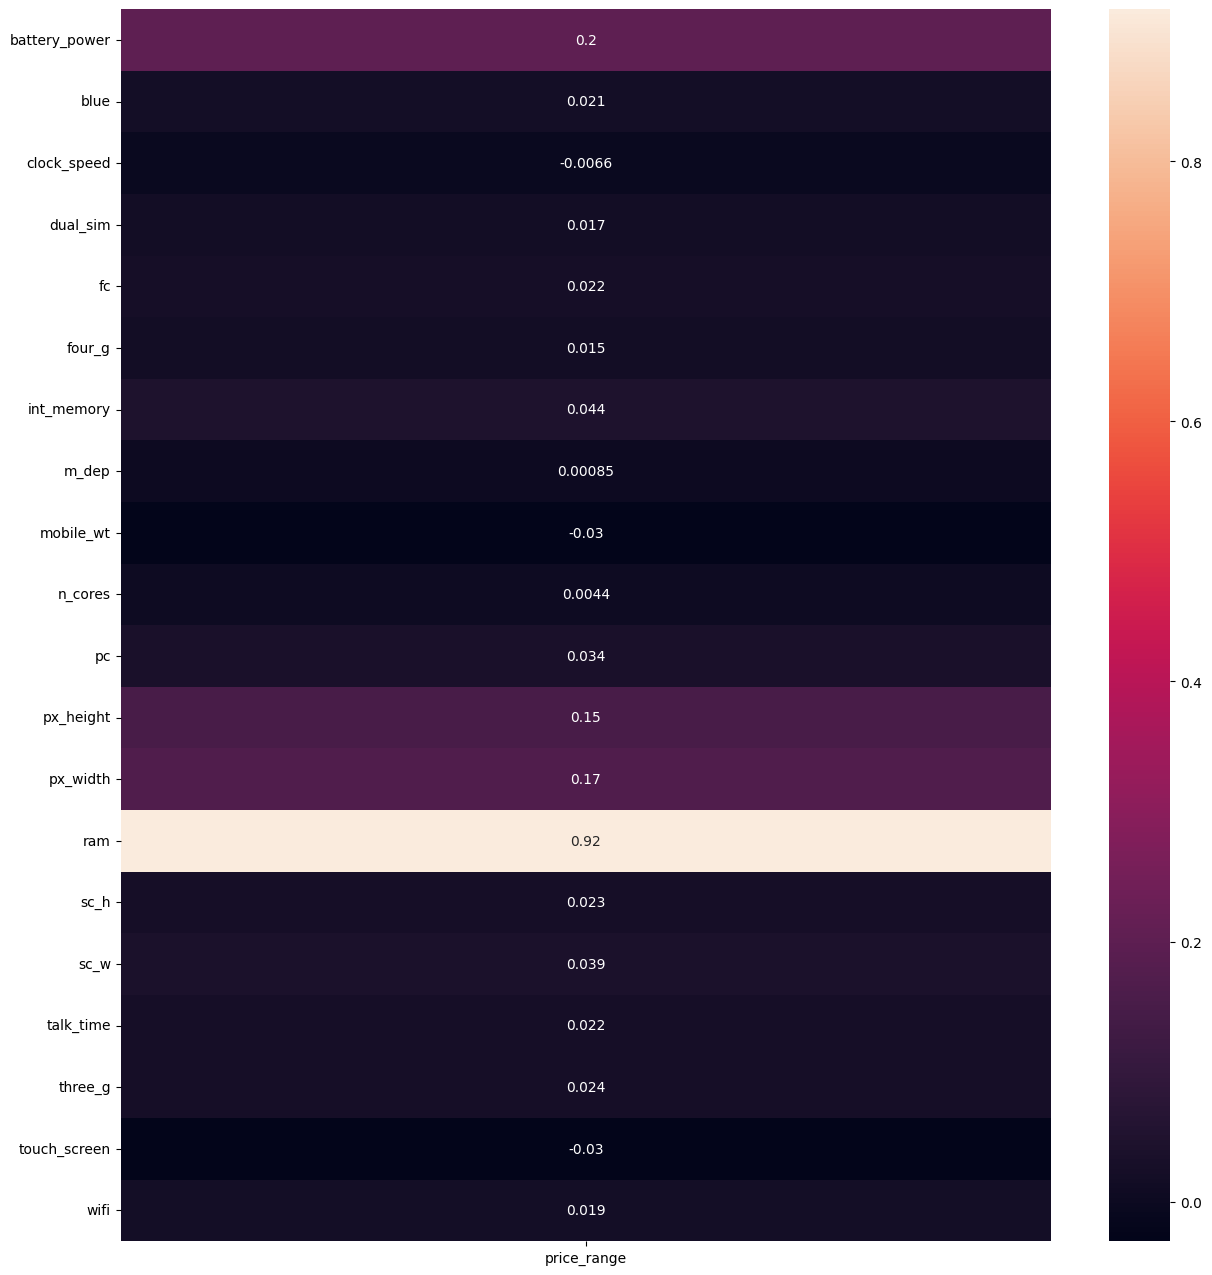

In [15]:
plt.figure(figsize=(15,16))
sns.heatmap(price_range_corr,annot=True)
plt.show()

Here, Ram has strong correlation with the price range, meaning as ram increases price range also increases. Other than that, every other features have weak correlation wrt price range so they do not have major affect on the price range 

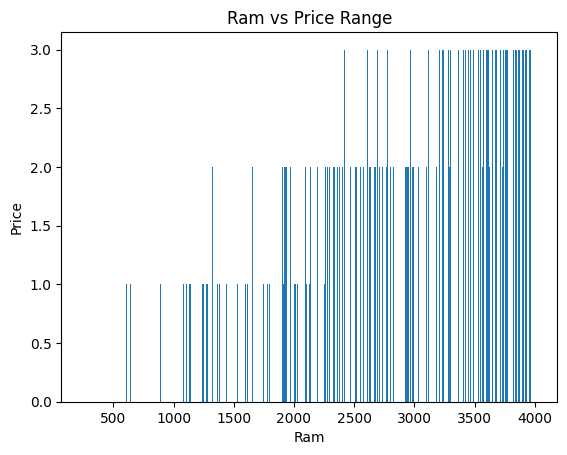

In [47]:
plt.bar(data_train['ram'],data_train['price_range'])
plt.title('Ram vs Price Range')
plt.xlabel("Ram")
plt.ylabel("Price")
# plt.figure(figsize=(15,6))
plt.show()

# Training the model

In [17]:
X=data_train.drop('price_range',axis=1)
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [18]:
Y=data_train['price_range']
Y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [20]:
data_train.head(n=0)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [21]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [22]:
X_std=std.fit_transform(X)
data_test_std=std.transform(data_test)

In [23]:
X_std

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [24]:
data_test_std

array([[-0.44505984,  1.0100505 ,  0.34046327, ..., -1.78686097,
         0.99401789, -1.01409939],
       [-0.90487356,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 1.29403758,  1.0100505 ,  1.56625363, ..., -1.78686097,
         0.99401789,  0.98609664],
       ...,
       [-0.12182446, -0.9900495 , -0.14985287, ...,  0.55964063,
        -1.00601811, -1.01409939],
       [ 0.67032987,  1.0100505 , -1.2530642 , ..., -1.78686097,
         0.99401789, -1.01409939],
       [ 0.07166151,  1.0100505 , -1.2530642 , ...,  0.55964063,
        -1.00601811,  0.98609664]])

## 1. Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [26]:
dt.fit(X_std,Y)

DecisionTreeClassifier()

In [27]:
dt_train_accuracy = dt.score(X_std, Y)
print(f"Training Accuracy: {dt_train_accuracy}")


Training Accuracy: 1.0


In [28]:
dt_cv_scores = cross_val_score(dt, X_std, Y, cv=5)
dt_mean=dt_cv_scores.mean()
# Print the cross-validation scores and the mean score
print("Cross-validation scores:", dt_cv_scores)
print("Mean CV score:", dt_cv_scores.mean())

Cross-validation scores: [0.84   0.835  0.8    0.825  0.8225]
Mean CV score: 0.8244999999999999


In [29]:
# dt.predict(data_test_std)

## 2. KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [31]:
knn.fit(X_std,Y)

KNeighborsClassifier()

In [32]:
knn_train_accuracy = knn.score(X_std, Y)
print(f"Training Accuracy: {knn_train_accuracy}")


Training Accuracy: 0.699


In [33]:
# knn.predict(data_test_std)

## 3. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [35]:
lr.fit(X_std,Y)

LogisticRegression()

In [36]:
lr_train_accuracy = dt.score(X_std, Y)
print(f"Training Accuracy: {lr_train_accuracy}")


Training Accuracy: 1.0


In [37]:
lr_cv_scores = cross_val_score(lr, X_std, Y, cv=5)
lr_mean=lr_cv_scores.mean()

# Print the cross-validation scores and the mean score
print("Cross-validation scores:", lr_cv_scores)
print("Mean CV score:", lr_cv_scores.mean())

Cross-validation scores: [0.96   0.955  0.9675 0.965  0.9675]
Mean CV score: 0.9630000000000001


## 4. Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_std,Y)


RandomForestClassifier()

In [39]:
rf_train_accuracy = dt.score(X_std, Y)
print(f"Training Accuracy: {rf_train_accuracy}")


Training Accuracy: 1.0


In [40]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf, X_std, Y, cv=5)
rf_mean=rf_cv_scores.mean()

print("Cross-validation scores:", rf_cv_scores)
print("Mean CV score:", rf_cv_scores.mean())

Cross-validation scores: [0.8775 0.885  0.89   0.8675 0.85  ]
Mean CV score: 0.874


In [41]:
# Y_pred=rf.predict(data_test_std)
# Y_pred

Except KNN, others achieved 100% train accuracy which maybe due to overfitting so we also used cross-validation

In [42]:
dict_var={
    'decision tree':dt_mean,
    'LogisticRegression':lr_mean,
    'Random Forest':rf_mean
}
dict_var
df=pd.DataFrame([dict_var])
print("Results of cross-validation: ")
df

Results of cross-validation: 


,decision tree,LogisticRegression,Random Forest
0,0.8245,0.963,0.874


Since logistic regression achieved highest accuracy, we use this to predict test price_range

In [43]:
y_pred = lr.predict(data_test_std)
y_pred

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 0, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 2, 3, 2, 3, 2, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 0, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,